MACHINE LEARNING ASSIGNMENT 5

ARPIT SAGAR

3CO6

102003130

In [ ]:
import numpy as np
import pandas as pd

QUES 1

In [ ]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)

In [ ]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)

In [ ]:
from google.colab import files
upload=files.upload()
#iris dataset upload

Saving Iris.csv to Iris.csv


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/Iris.csv")

In [ ]:
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

# Loading the dataset
dataset = load_iris()
X = dataset.data
y = dataset.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size = 0.1, random_state = 13)

# Creating the SVM model
model = OneVsRestClassifier(SVC())

# Fitting the model with training data
model.fit(X_train, y_train)

# Making a prediction on the test set
prediction = model.predict(X_test)

# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")


Test Set Accuracy : 80.0 %


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.57      1.00      0.73         4
           2       1.00      0.57      0.73         7

    accuracy                           0.80        15
   macro avg       0.86      0.86      0.82        15
weighted avg       0.89      0.80      0.80        15



QUES 2 

RIDGE LOGISTIC REGRESSION

In [ ]:
from google.colab import files
upload=files.upload()

Saving exam6.txt to exam6.txt


In [ ]:
import pandas as pd
df=pd.read_csv('exam6.txt')

In [ ]:
df

,0.051267,0.69956,1
0,-0.092742,0.684940,1
1,-0.213710,0.692250,1
2,-0.375000,0.502190,1
3,-0.513250,0.465640,1
4,-0.524770,0.209800,1
...,...,...,...
112,-0.720620,0.538740,0
113,-0.593890,0.494880,0
114,-0.484450,0.999270,0
115,-0.006336,0.999270,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0.051267  117 non-null    float64
 1   0.69956   117 non-null    float64
 2   1         117 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


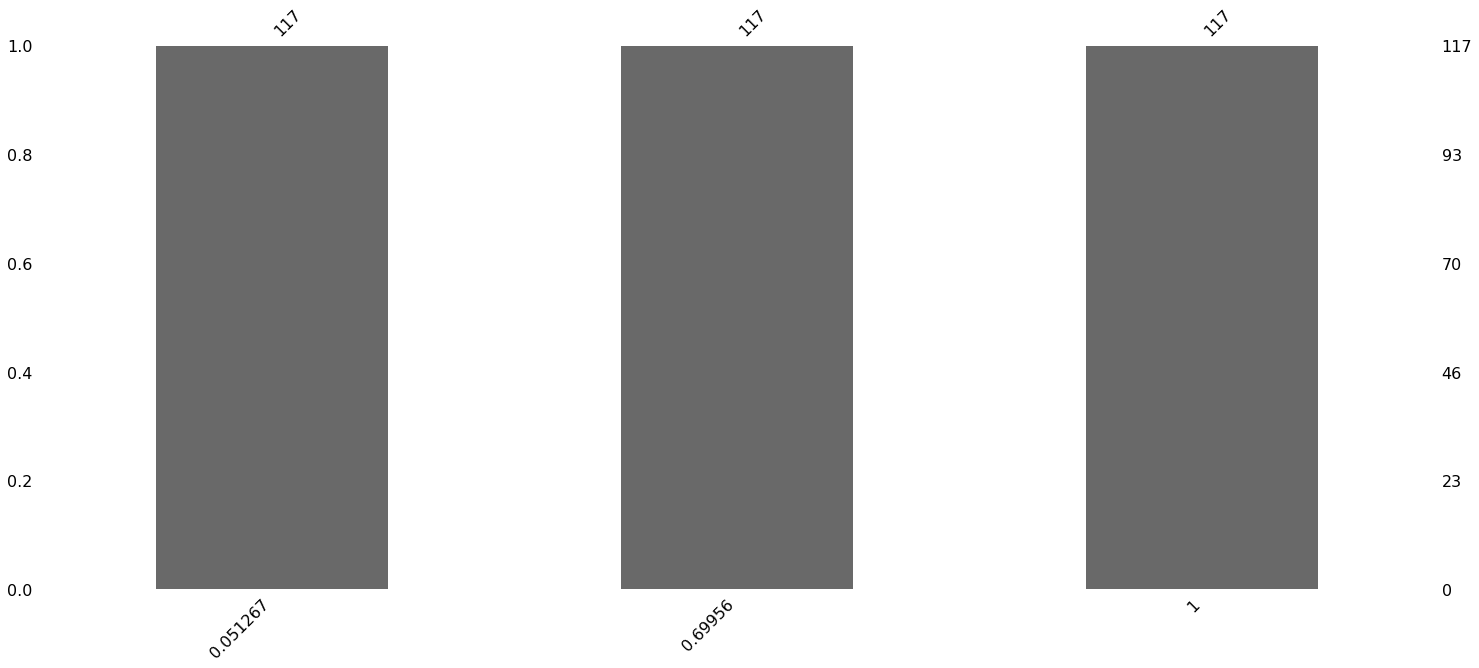

In [ ]:
#Checking for Null values
import missingno as msn
msn.bar(df.iloc[:,0:3])

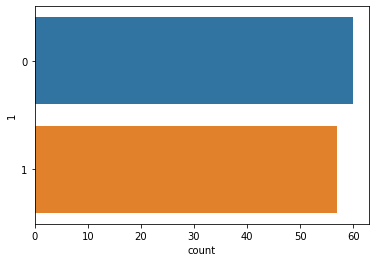

In [ ]:
#Checking for class balancing
import seaborn as sns
sns.countplot(y=df.iloc[:,2],data=df)

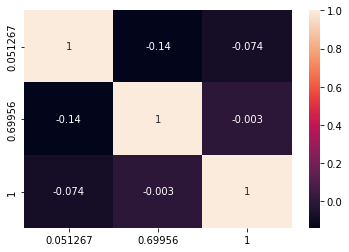

In [ ]:
sns.heatmap(df.iloc[:,:3].corr(),annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X=df.iloc[:,0:2]
Y=df.iloc[:,2]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
x = df.iloc[:,:2]
x = np.array(x)
x
from sklearn.preprocessing import PolynomialFeatures

trans = PolynomialFeatures(degree=6)
x = trans.fit_transform(x)
x = np.insert(x, 0, 1, 1)
x.shape

(117, 29)

Part(i)

Step-by-Step Logistic Regression

 (with no regularization; alpha=10; number of iterations=1000)

In [ ]:
n=1000 #number of iterations
alpha=10
m,k=X_train.shape
beta=np.zeros(k)
for i in range(n):
    cost_gradient=np.zeros(k)
    z=X_train.dot(beta)
    predicted=1/(1+np.exp(-z))
    difference=predicted-Y_train
    for j in range(k):
        cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
    for j in range(k):
        beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
print(beta)

[-1.6785379   0.03566675 -0.25690168]


In [ ]:
Y_predict = 1/(1+np.exp(-(X_test.dot(beta))))
Y_label = np.zeros(len(Y_predict))

for i in range(len(Y_predict)):
    if(Y_predict[i]>=0.5):
        Y_label[i]=1
        
TP=0
TN=0
FP=0
FN=0

Y_test = np.array(Y_test).reshape(-1,1)

for i in range(len(Y_label)):

    if(Y_test[i]==1 and Y_label[i]==1):
        TP=TP+1
    if(Y_test[i]==1 and Y_label[i]==0):
        FN=FN+1

    if(Y_test[i]==0 and Y_label[i]==1):
        FP=FP+1

    if(Y_test[i]==0 and Y_label[i]==0):
        TN=TN+1

print(TP,TN,FP,FN)

0 17 0 19


Part (ii)

Step-by-Step Logistic Regression 

(with ridge regularization; alpha=10;
number of iterations=1000; lambda=0.2)

In [ ]:
n=1000 #number of iterations

alpha=10
lamda = 0.2
m,k=X_train.shape

beta=np.zeros(k)
for i in range(n):
    cost_gradient=np.zeros(k)
    z=X_train.dot(beta)
    predicted=1/(1+np.exp(-z))
    #print(predicted)
    difference=predicted-Y_train
    for j in range(k):
        cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))

    for j in range(k):
        beta[j]=beta[j]*(1 - alpha*lamda/m)-(alpha/m)*cost_gradient[j]
beta

array([-1.74542921,  0.02238029, -0.25053841])

In [ ]:
Y_predict=1/(1+np.exp(-(X_test.dot(beta))))
Y_label=np.zeros(len(Y_predict))

for i in range(len(Y_predict)):
    if(Y_predict[i]>=0.5):
        Y_label[i]=1
        
TP=0
TN=0
FP=0
FN=0

Y_test=np.array(Y_test).reshape(-1,1)

for i in range(len(Y_label)):

    if(Y_test[i]==1 and Y_label[i]==1):
        TP=TP+1
    if(Y_test[i]==1 and Y_label[i]==0):
        FN=FN+1

    if(Y_test[i]==0 and Y_label[i]==1):
        FP=FP+1

    if(Y_test[i]==0 and Y_label[i]==0):
        TN=TN+1

print(TP,TN,FP,FN)

0 17 0 19
